<a href="https://colab.research.google.com/github/carloslocatellij/bitdark/blob/master/C%C3%B3pia_de_QUEIMADAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 31.8 MB/s eta 0:00:00


In [ ]:
pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
import pandas as pd
import geopandas as gpd
import descartes
from shapely.geometry import Point
import fiona
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [ ]:
from shapely.geometry import MultiPoint, Point

In [ ]:
from branca.colormap import linear

In [ ]:
from pathlib import Path
arquivo = Path( Path.home(), 'home', 'regioes.kml')

In [ ]:
fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [ ]:
geoRP = gpd.read_file('/home/REGIOES.kml', driver='KML')

# Nova seção

In [ ]:
DfFocos2021 = pd.read_csv('/home/Focos_01.csv', sep=',', decimal='.') #.dropna(subset=["Latitude", "Longitude"])

In [ ]:
geoRP.dropna(thresh=4, inplace=True)
DfFocos2021.dropna(thresh=2,inplace=True)

In [ ]:
DfFocos2021 = DfFocos2021[DfFocos2021['datahora']>='2021/01/01 00:00:00']

In [ ]:
DfFocos2021.fillna({'frp':'0.0'}, inplace=True)

In [ ]:
DfFocos2021['latitude'] = DfFocos2021['latitude']
DfFocos2021['longitude'] = DfFocos2021['longitude']
DfFocos2021['frp'] = DfFocos2021['frp']

In [ ]:
geoRP.head()

,Name,Description,geometry
0,Talhado,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-49.34064 -20.66334 0.00000,..."
1,Talhado,,POINT Z (-49.32200 -20.72447 0.00000)
2,Cidade da Criança,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-49.43173 -20.78354 0.00000,..."
3,Cidade da Criança,,POINT Z (-49.42073 -20.80226 0.00000)
4,Pinheirinho,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-49.43172 -20.78356 0.00000,..."


In [ ]:
DfFocos2021.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry
0,2021/08/20 19:33:17,GOES-16,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,29.0,0.0,1.0,-20.74000,-49.37000,13.7,POINT (-49.37000 -20.74000)
1,2021/08/20 17:07:00,AQUA_M-T,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,29.0,0.0,1.0,-20.74504,-49.36939,5.3,POINT (-49.36939 -20.74504)
2,2021/08/21 17:32:00,NOAA-20,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,30.0,0.0,1.0,-20.74112,-49.37215,1.8,POINT (-49.37215 -20.74112)
3,2021/08/21 17:32:00,NOAA-20,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,30.0,0.0,1.0,-20.74046,-49.36905,1.8,POINT (-49.36905 -20.74046)
4,2021/08/21 17:32:00,NOAA-20,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,30.0,0.0,1.0,-20.73540,-49.37018,2.2,POINT (-49.37018 -20.73540)


In [ ]:
geometry = [Point(xy) for xy in zip(DfFocos2021.longitude, DfFocos2021.latitude)]
#http://www.spatialreference.org/ref/epsg/2263/
geofc = gpd.GeoDataFrame(DfFocos2021, crs=geoRP.crs ,geometry=geometry)

In [ ]:
geofc.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   datahora      222 non-null    object  
 1   satelite      222 non-null    object  
 2   pais          222 non-null    object  
 3   estado        222 non-null    object  
 4   municipio     222 non-null    object  
 5   bioma         222 non-null    object  
 6   diasemchuva   211 non-null    float64 
 7   precipitacao  211 non-null    float64 
 8   riscofogo     217 non-null    float64 
 9   latitude      222 non-null    float64 
 10  longitude     222 non-null    float64 
 11  frp           222 non-null    float64 
 12  geometry      222 non-null    geometry
dtypes: float64(6), geometry(1), object(6)
memory usage: 24.3+ KB


In [ ]:
geoFocosReg = gpd.sjoin(geofc, geoRP, how='inner', predicate='intersects')

In [ ]:
geoFocosReg.head()

,datahora,satelite,pais,estado,municipio,bioma,diasemchuva,precipitacao,riscofogo,latitude,longitude,frp,geometry,index_right,Name,Description
0,2021/08/20 19:33:17,GOES-16,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,29.0,0.0,1.0,-20.74000,-49.37000,13.7,POINT (-49.37000 -20.74000),6,Bosque,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For..."
1,2021/08/20 17:07:00,AQUA_M-T,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,29.0,0.0,1.0,-20.74504,-49.36939,5.3,POINT (-49.36939 -20.74504),6,Bosque,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For..."
2,2021/08/21 17:32:00,NOAA-20,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,30.0,0.0,1.0,-20.74112,-49.37215,1.8,POINT (-49.37215 -20.74112),6,Bosque,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For..."
3,2021/08/21 17:32:00,NOAA-20,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,30.0,0.0,1.0,-20.74046,-49.36905,1.8,POINT (-49.36905 -20.74046),6,Bosque,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For..."
4,2021/08/21 17:32:00,NOAA-20,Brasil,SAO PAULO,SAO JOSE DO RIO PRETO,Cerrado,30.0,0.0,1.0,-20.73540,-49.37018,2.2,POINT (-49.37018 -20.73540),6,Bosque,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For..."


In [ ]:
geoFocosReg['frp'].median()

10.1

In [ ]:
geoFocosReg['frp'].fillna(value=geoFocosReg['frp'].median(), inplace=True)

In [ ]:
lat = geoFocosReg['latitude'].values
long = geoFocosReg['longitude'].values
dt = geoFocosReg['datahora'].values
bio = geoFocosReg['bioma'].values
frp = geoFocosReg['frp'].values
txt = zip (dt, bio)
reg = geoFocosReg['Name'].values
coordenadas = []
popup = []
icon = []

In [ ]:
iconcor ={'Cidade da Criança': 'cadetblue',
 'CEU': 'grey',
 'Vila Toninho': 'black',
 'Talhado': 'purple',
 'Central': 'white',
 'Pinheirinho': 'darkred',
 'Bosque': 'green',
 'HB': 'red',
 'Schmitt': 'orange',
 'Represa': 'blue'}

In [ ]:
mc = MarkerCluster()
    
for la,lo,r ,t in zip(lat,long, reg, txt):
  mc.add_child(folium.Marker([la, lo], 
              popup=t,
              tooltip=r,
              icon=folium.Icon(color=iconcor[r],icon='fire'))).add_to(m)


<ipython-input-96-338b2616b340>:7: UserWarning: color argument of Icon should be one of: {'cadetblue', 'darkred', 'gray', 'red', 'pink', 'blue', 'lightred', 'darkblue', 'lightgreen', 'purple', 'lightblue', 'black', 'orange', 'white', 'lightgray', 'beige', 'darkgreen', 'darkpurple', 'green'}.
  icon=folium.Icon(color=iconcor[r],icon='fire'))).add_to(m)


In [ ]:
#cmap = linear.OrRd_07.scale(geoFocosReg[ft].value_counts().min(), geoFocosReg[ft].value_counts().max())

In [ ]:
ft = 'color'

In [ ]:
m = folium.Map(location=[ -20.811387, -49.380127], tiles='OpenStreetMap' ,zoom_start=12, min_zoom=9,
               min_lat=-20.9, max_lat=-20.4,min_lon=-49.5, max_lon=-49.1)

folium.GeoJson(geofc, style_function=lambda feature: { 
             'fillOpacity' : 0.5, 
             'weight' : 8 }).add_to(m) 

folium.GeoJson(data=geoRP["geometry"]).add_to(m)
folium.LayerControl(collapsed=True).add_to(m)
m.save('Cluster_Queimadas_Regioes.html')

m

In [ ]:
geoFocosReg.Name.value_counts()

Pinheirinho          60
HB                   46
Bosque               44
CEU                  24
Schmitt              18
Talhado              10
Cidade da Criança    10
Vila Toninho          7
Represa               2
Name: Name, dtype: int64

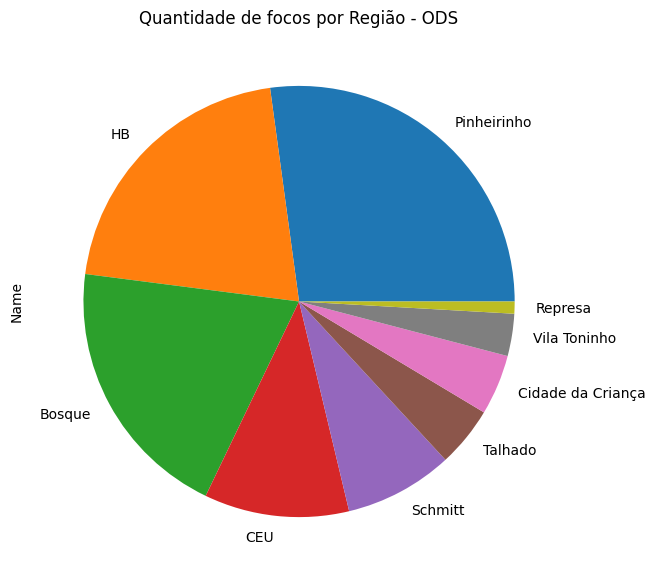

In [ ]:

f, ax = plt.subplots(1, 1 ,  )

plt.xticks(rotation=90)
#geoFocosReg.Nome.value_counts().plot(kind='bar', ax=ax[0])
#plt.title('Quantidade de focos por Região - ODS')
geoFocosReg.Name.value_counts().plot(kind='pie', figsize=(7,7), )
plt.title('Quantidade de focos por Região - ODS')
plt.savefig('qtd_focos_por_Regiao.svg')

In [ ]:
hmap = folium.Map(location=[ -20.811387, -49.380127], tiles='OpenStreetMap' ,zoom_start=12, min_zoom=9,
               min_lat=-20.9, max_lat=-20.4,min_lon=-49.5, max_lon=-49.1)

sizef = geoFocosReg.frp*5.5


folium.GeoJson(geoRP, style_function=lambda feature: { 
            'fillOpacity' : .5, 
            'weight' : 1 ,
            'fillColor': iconcor }).add_to(hmap)

hm_wide = HeatMap(list(zip(lat, long)), min_opacity=1,
                   radius=25, blur=22, 
                   max_zoom=1.8)

hmap.add_child(hm_wide)

folium.LayerControl(collapsed=False).add_to(hmap)
folium.GeoJson(data=geoRP["geometry"]).add_to(hmap)

hmap.save('Mapa_de_calor_Queimadas_2021.html')
hmap


        BB = FRP * β

    A Energia Radiativa do Fogo (FRP) é uma técnica para quantificar a biomassa queimada usando dados de sensoriamento remoto. A FRP mede a energia radiante emitida por unidade de tempo pela vegetação queimada.
    

<Axes: >

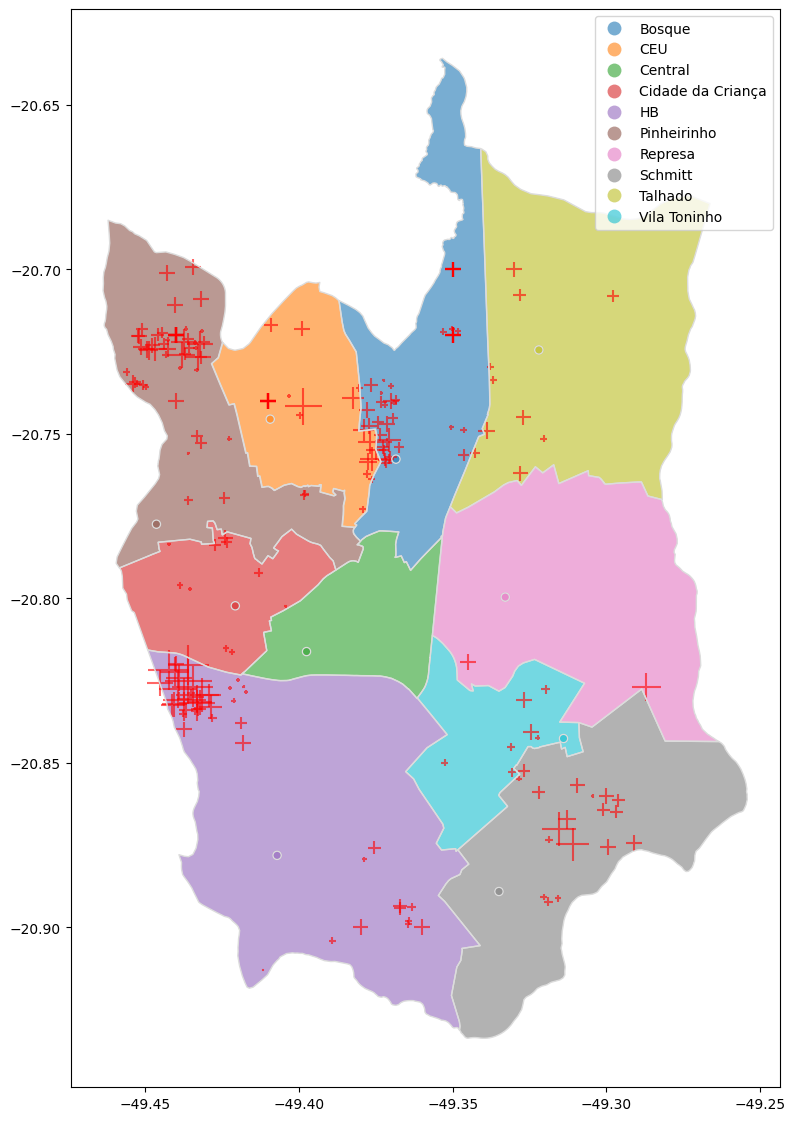

In [ ]:
ax= geoRP.plot(figsize=(14,14), color='none', edgecolor='gainsboro', zorder=3)
sizef = geoFocosReg.frp*9.5
geoRP.plot(categorical=True, column='Name', legend='Nome' , alpha=0.6, ax=ax)
geoFocosReg[(geoFocosReg.datahora>='2021/01/01 00:00:00') & (geoFocosReg.datahora<'2021/12/31 23:59:00')].plot(categorical=True, color='red' , alpha=0.6, marker='+' , markersize=sizef, ax=ax)

<Axes: >

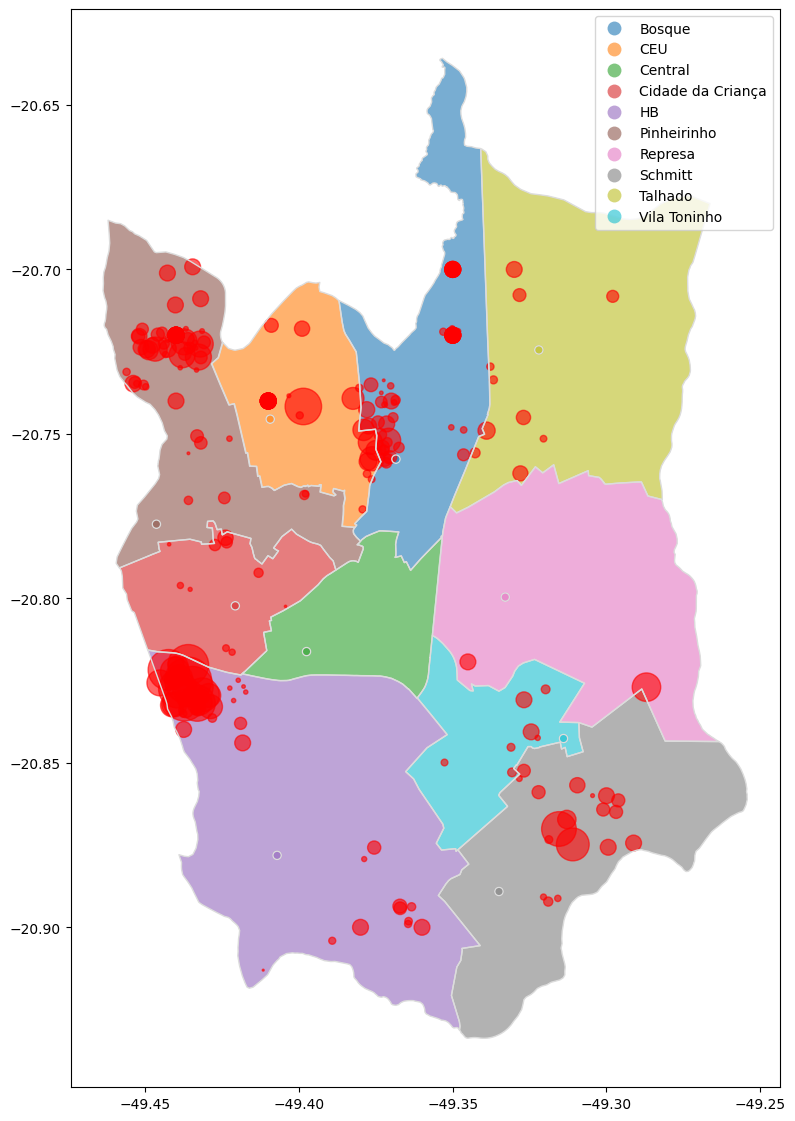

In [ ]:
ax= geoRP.plot(figsize=(14,14), color='none', edgecolor='gainsboro', zorder=3)
sizef = geoFocosReg.frp*9.5
geoRP.plot(categorical=True, column='Name', legend='Nome' , alpha=0.6, ax=ax)
geoFocosReg.plot(categorical=True, color='red' , alpha=0.6, marker='o' , markersize=sizef, ax=ax)

<Axes: xlabel='Name', ylabel='frp'>

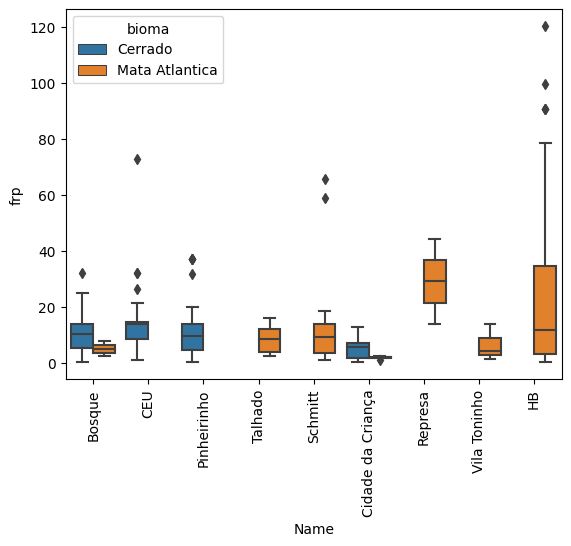

In [ ]:
plt.xticks(rotation=90)
sns.boxplot(x=geoFocosReg.Name, y=geoFocosReg.frp, hue=geoFocosReg.bioma)